In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e6/sample_submission.csv
/kaggle/input/playground-series-s3e6/train.csv
/kaggle/input/playground-series-s3e6/test.csv


# **Solution for playground series season 3 episode 6**

**Fastai solution**

Imports

In [2]:
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
!ls /kaggle/input/playground-series-s3e6

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
sample_submission.csv  test.csv  train.csv


In [4]:
path = Path('/kaggle/input/playground-series-s3e6')
path

Path('/kaggle/input/playground-series-s3e6')

Define dataframes

In [5]:
train_df = pd.read_csv(path/'train.csv', index_col='id')
test_df = pd.read_csv(path/'test.csv', index_col = 'id')
sample_df = pd.read_csv(path/'sample_submission.csv', index_col = 'id')

In [6]:
train_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
id,,,,,,,,,,,,,,,,,
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4


In [7]:
train_df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [8]:
#identify cont and cat variables 
cont_names, cat_names = cont_cat_split(train_df)

In [9]:
cont_names

['squareMeters',
 'numberOfRooms',
 'floors',
 'cityCode',
 'made',
 'basement',
 'attic',
 'garage',
 'price']

In [10]:
cat_names

['hasYard',
 'hasPool',
 'cityPartRange',
 'numPrevOwners',
 'isNewBuilt',
 'hasStormProtector',
 'hasStorageRoom',
 'hasGuestRoom']

In [11]:
cat_names = ['hasYard','hasPool','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom','hasGuestRoom'],
cont_names = ['squareMeters','numberOfRooms','floors','cityCode','made','basement','attic','garage',],

In [12]:
cont_names

(['squareMeters',
  'numberOfRooms',
  'floors',
  'cityCode',
  'made',
  'basement',
  'attic',
  'garage'],)

Build dataloaders

In [13]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="price",
    cat_names = ['hasYard','hasPool','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom','hasGuestRoom'],
    cont_names = ['squareMeters','numberOfRooms','floors','cityCode','made','basement','attic','garage',],
    procs = [Categorify, FillMissing, Normalize])

In [14]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [15]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['hasYard','hasPool','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom','hasGuestRoom'],
                   cont_names = ['squareMeters','numberOfRooms','floors','cityCode','made','basement','attic','garage',],
                   y_names='price',
                   splits=splits)

In [16]:
to.xs.iloc[:2]

,hasYard,hasPool,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,hasStorageRoom,hasGuestRoom,squareMeters,numberOfRooms,floors,cityCode,made,basement,attic,garage
id,,,,,,,,,,,,,,,,
17185,2,1,4,3,1,1,1,3,-0.063355,-1.426090,-0.837724,-0.179296,-0.067461,0.020846,-0.093914,0.942550
1813,1,1,7,1,2,2,2,7,0.303726,-0.330207,0.284367,-1.615406,0.041944,-0.329060,-1.495083,0.145851


In [17]:
dls = to.dataloaders(bs=64)

In [18]:
dls.show_batch()

,hasYard,hasPool,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,hasStorageRoom,hasGuestRoom,squareMeters,numberOfRooms,floors,cityCode,made,basement,attic,garage,price
0,0,1,2,3,0,1,0,10,94351.001430,35.000000,37.000000,76197.000482,2018.000000,8383.999954,802.999928,135.000015,9.442917e+06
1,1,0,8,3,1,1,1,6,82141.000388,57.000000,80.999999,42669.999955,2019.000000,7173.000006,6896.000018,612.999997,8.225971e+06
2,1,0,10,3,0,1,1,7,692.001032,18.000000,13.999999,73129.000535,2014.000000,4975.999995,995.000145,613.999999,7.892440e+04
3,1,1,1,9,0,1,1,8,14932.999468,78.000001,50.000000,45035.999907,2020.000000,7266.000003,775.000069,348.999996,1.500885e+06
4,0,0,2,3,0,1,1,7,69080.000247,35.000000,34.000000,84276.998571,2004.000000,4198.999995,3509.000005,303.000002,6.911182e+06
5,0,1,9,10,1,0,1,4,15821.998450,47.000000,38.000000,51544.000048,1995.000000,8175.999929,7528.000012,811.999999,1.584936e+06
6,1,0,7,8,0,0,0,2,31989.999458,88.000002,100.000003,64375.999901,2018.000000,1985.000033,4926.000002,990.000010,3.204948e+06
7,1,1,7,1,1,1,1,4,34060.000082,47.000000,68.000001,85057.999322,1998.000000,1400.000147,4395.999994,125.000008,3.414056e+06
8,1,0,5,10,0,1,1,0,58855.000175,8.000000,34.000000,18782.000040,2004.000000,3573.000026,3754.999978,957.000006,5.892518e+06
9,0,0,5,9,0,0,0,9,45140.000010,37.000000,75.000000,84708.001300,1992.999999,7412.999993,5658.000020,345.000003,4.520882e+06


Tabular learner

SuggestedLRs(valley=0.3019951581954956)

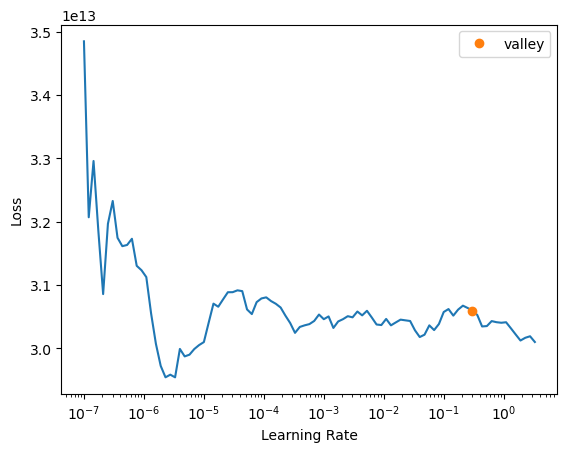

In [19]:
learn = tabular_learner(dls, metrics=rmse)
learn.lr_find()

In [20]:
learn.fit_one_cycle(10,1e-2)

epoch,train_loss,valid_loss,_rmse,time
0,30936576032768.000000,29725592387584.000000,5452118.000000,00:03
1,30367746621440.000000,29710453047296.000000,5450729.000000,00:03
2,29982682251264.000000,29660278685696.000000,5446124.500000,00:03
3,29979836416000.000000,29594319060992.000000,5440065.500000,00:03
4,29626611007488.000000,29511116652544.000000,5432413.000000,00:03
5,30095077015552.000000,29482326949888.000000,5429763.500000,00:03
6,30174389207040.000000,29399523000320.000000,5422132.500000,00:03
7,29457207263232.000000,29356743196672.000000,5418186.000000,00:03
8,29759400574976.000000,29348008558592.000000,5417380.000000,00:03
9,29723079999488.000000,29361317085184.000000,5418608.000000,00:03


In [21]:
learn.show_results()

,hasYard,hasPool,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,hasStorageRoom,hasGuestRoom,squareMeters,numberOfRooms,floors,cityCode,made,basement,attic,garage,price,price_pred
0,1.0,2.0,3.0,9.0,1.0,1.0,1.0,8.0,0.718994,1.295942,0.032864,1.344776,0.067191,-1.141952,0.811995,1.340900,8519160.000,55057.492188
1,2.0,1.0,9.0,6.0,2.0,1.0,2.0,7.0,-0.786730,1.543400,0.148942,1.523326,0.100854,-0.590762,1.144395,0.428317,474915.000,-5359.415039
2,1.0,1.0,2.0,9.0,1.0,1.0,2.0,2.0,-0.416241,1.048485,0.419791,0.206682,-0.025382,0.379475,0.345045,0.826667,2458884.500,9874.645508
3,2.0,1.0,5.0,2.0,2.0,1.0,2.0,10.0,0.455439,-0.012047,0.613255,1.523326,0.084023,0.463478,-1.450551,-0.256120,7118345.000,44856.710938
4,1.0,2.0,8.0,1.0,1.0,2.0,1.0,5.0,0.073376,-0.259505,-0.721646,1.001301,0.067191,1.079609,1.312027,-1.389606,5074190.500,29652.847656
5,1.0,2.0,8.0,7.0,2.0,2.0,1.0,3.0,0.619512,0.306112,0.342406,-1.440843,-0.042213,0.113572,0.722613,0.388482,7987847.500,51090.984375
6,1.0,1.0,1.0,4.0,2.0,2.0,2.0,3.0,0.413789,0.306112,-0.141254,0.245097,-0.042213,-1.664388,0.517130,-1.494626,6887892.500,42969.265625
7,1.0,1.0,4.0,9.0,2.0,1.0,2.0,7.0,-0.647621,-1.390739,-0.605567,0.043484,-0.025382,-0.264442,1.244911,-0.111266,1218405.500,210.956482
8,2.0,1.0,7.0,6.0,1.0,2.0,1.0,4.0,-0.696725,-0.365558,-0.237986,-0.788652,0.050360,1.409483,-0.478480,1.043948,955981.375,-1804.259155


Predictions on validation set

In [22]:
dl = learn.dls.test_dl(test_df)

In [23]:
preds = learn.get_preds(dl=dl)
preds

(tensor([[27463.6230],
         [38158.9844],
         [59202.8867],
         ...,
         [46615.2031],
         [49580.8477],
         [ 4771.3491]]),
 None)

Submit to kaggle|

In [24]:
target_preds = preds[0]

In [25]:
test_df['price'] = target_preds

test_df.to_csv('submission.csv', columns=['price'], index=True)

submission = pd.read_csv('submission.csv')
submission.head()

,id,price
0,22730,27463.6230
1,22731,38158.9840
2,22732,59202.8870
3,22733,3377.3418
4,22734,41822.6370
